In [2]:
import os
print(os.path.abspath(os.curdir))
#os.chdir("..")

/usr/local/share


In [3]:
meetings = ["message","origin","pleas","email","thank","attach","file","cop","inform","receiv"]
count_meetings = 0
process = ["deal","enron","agreement","chang","contract","corp","fax","houston","date","america"]
count_process = 0
core = ['market','gas','price','power','company','energy','trade','busi','servic']
count_core = 0
casual = ['thank','call','time','meet','look','week','day','dont','vinc','talk']
count_casual = 0

In [208]:
from datetime import datetime
import glob
import csv
from email.parser import Parser
json_files7 = glob.glob("/usr/local/share/maildir/*/_sent_mail/*")

meeting_csv = []
process_csv = []
core_csv = []
casual_csv = []

for file in json_files7:
    try:
        with open(file) as data_file:
            email = Parser().parse(data_file)
            subject = email['Subject']
            date = email['Date']
            datetime_object = datetime.strptime(date[5:-21], '%d %b %Y').date()
            month = datetime_object.month
            year = datetime_object.year
            #datetime_object = [str(datetime_object)]
            
            
            if any(word in subject for word in meetings):
                count_meetings = count_meetings+1
                meeting_csv.append([year,month,count_meetings])
                    
            
            if any(word in subject for word in process):
                count_process = count_process+1
                process_csv.append([year,month,count_process])
            
            if any(word in subject for word in core):
                count_core = count_core+1
                core_csv.append([year,month,count_core])
            
            if any(word in subject for word in casual):
                count_casual = count_casual+1
                casual_csv.append([year,month,count_casual])
       
    except PermissionError:
        pass
    
meeting_csv.sort(key=lambda x: (x[0],x[1]))
process_csv.sort(key=lambda x: (x[0],x[1]))
casual_csv.sort(key=lambda x: (x[0],x[1]))
core_csv.sort(key=lambda x: (x[0],x[1]))


    
with open("enron_meetings.csv","w",encoding='utf-8') as myfile1:
    writer_meetings = csv.writer(myfile1, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer_meetings.writerow(["Year","Month","Count"])
    for a in range(0,len(meeting_csv)):
        writer_meetings.writerow([meeting_csv[a][0],meeting_csv[a][1],meeting_csv[a][2]])
        
with open("enron_process.csv","w",encoding='utf-8') as myfile2:
    writer_process = csv.writer(myfile2, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer_process.writerow(["Year","Month","Count"])
    for a in range(0,len(process_csv)):
        writer_process.writerow([process_csv[a][0],process_csv[a][1],process_csv[a][2]])
    
with open("enron_core.csv","w",encoding='utf-8') as myfile3:
    writer_core = csv.writer(myfile3, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer_core.writerow(["Year","Month","Count"])
    for a in range(0,len(core_csv)):
        writer_core.writerow([core_csv[a][0],core_csv[a][1],core_csv[a][2]])
    
with open("enron_casual.csv","w",encoding='utf-8') as myfile4:
    writer_casual = csv.writer(myfile4, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer_casual.writerow(["Year","Month","Count"])
    for a in range(0,len(casual_csv)):
        writer_casual.writerow([casual_csv[a][0],casual_csv[a][1],casual_csv[a][2]])
    
print(count_meetings)
print(count_process)
print(count_core)
print(count_casual)

3156
15696
5448
14820


In [209]:
#recursive function to accumulate count over months and years
def rec(a):
    if a[i][0] == a[i+1][0]:
            if a[i][1] == a[i+1][1]:
                atotal = a[i][2]+a[i+1][2]
                #aprint_meeting.append([a[i][0],a[i][1],atotal])
                a[i][2] =atotal
                del(a[i+1])
                rec(a)

In [210]:
#getting a total count of meeting words in three years
try:
    for i in range(0,len(meeting_csv)):
        if meeting_csv[i][0] == meeting_csv[i+1][0]:
            if meeting_csv[i][1] == meeting_csv[i+1][1]:
                meeting_csv[i][2]= meeting_csv[i][2]+meeting_csv[i+1][2]
                del(meeting_csv[i+1])
                rec(meeting_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass

In [211]:
#getting a total count of process words in three years
try:
    for i in range(0,len(process_csv)):
        if process_csv[i][0] == process_csv[i+1][0]:
            if process_csv[i][1] == process_csv[i+1][1]:
                process_csv[i][2]= meeting_csv[i][2]+process_csv[i+1][2]
                del(process_csv[i+1])
                rec(process_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass

In [212]:
#getting a total count of core words in three years
try:
    for i in range(0,len(core_csv)):
        if core_csv[i][0] == core_csv[i+1][0]:
            if core_csv[i][1] == core_csv[i+1][1]:
                core_csv[i][2]= core_csv[i][2]+core_csv[i+1][2]
                del(core_csv[i+1])
                rec(core_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass

In [213]:
#getting a total count of casual words in three years
try:
    for i in range(0,len(casual_csv)):
        if casual_csv[i][0] == casual_csv[i+1][0]:
            if casual_csv[i][1] == casual_csv[i+1][1]:
                casual_csv[i][2]= casual_csv[i][2]+casual_csv[i+1][2]
                del(casual_csv[i+1])
                rec(casual_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass

In [200]:
core_csv

[[1999, 12, 18798],
 [2000, 1, 42444],
 [2000, 2, 18781],
 [2000, 3, 28289],
 [2000, 4, 47486],
 [2000, 5, 14018],
 [2000, 6, 71934],
 [2000, 7, 109194],
 [2000, 8, 131336],
 [2000, 9, 99581],
 [2000, 10, 169525],
 [2000, 11, 187095],
 [2000, 12, 214290],
 [2001, 1, 123535],
 [2001, 2, 100212],
 [2001, 3, 238853],
 [2001, 4, 395453],
 [2001, 5, 124749],
 [2001, 6, 28872]]

In [201]:
casual_csv

[[1999, 12, 142609],
 [2000, 1, 382517],
 [2000, 2, 281930],
 [2000, 3, 281925],
 [2000, 4, 414289],
 [2000, 5, 439432],
 [2000, 6, 745901],
 [2000, 7, 722641],
 [2000, 8, 939419],
 [2000, 9, 1066097],
 [2000, 10, 1558086],
 [2000, 11, 1477690],
 [2000, 12, 1555363],
 [2001, 1, 1209923],
 [2001, 2, 1099296],
 [2001, 3, 1471592],
 [2001, 4, 1357333],
 [2001, 5, 632304],
 [2001, 6, 212033],
 [2001, 11, 25100]]

In [202]:
process_csv

[[1999, 12, 182427],
 [2000, 1, 555203],
 [2000, 2, 348600],
 [2000, 3, 545218],
 [2000, 4, 441018],
 [2000, 5, 447666],
 [2000, 6, 931600],
 [2000, 7, 978423],
 [2000, 8, 850076],
 [2000, 9, 1452485],
 [2000, 10, 1075844],
 [2000, 11, 1161668],
 [2000, 12, 1487296],
 [2001, 1, 1580969],
 [2001, 2, 1661200],
 [2001, 3, 2074930],
 [2001, 4, 1679876],
 [2001, 5, 916370],
 [2001, 6, 71006]]

In [214]:
meeting_csv

[[1999, 12, 6153],
 [2000, 1, 17728],
 [2000, 2, 9050],
 [2000, 3, 20876],
 [2000, 5, 21085],
 [2000, 6, 33345],
 [2000, 7, 48705],
 [2000, 8, 63681],
 [2000, 9, 78453],
 [2000, 10, 39210],
 [2000, 11, 72208],
 [2000, 12, 42254],
 [2001, 1, 73185],
 [2001, 2, 74999],
 [2001, 3, 42919],
 [2001, 4, 84901],
 [2001, 5, 60964],
 [2001, 6, 2926],
 [2001, 8, 2933]]

In [233]:
#data for plots

#recursive function to accumulate count over months and years
meeting_csv.sort(key=lambda x: x[1])
process_csv.sort(key=lambda x: x[1])
core_csv.sort(key=lambda x: x[1])
casual_csv.sort(key=lambda x: x[1])

def rec1(a):
    if a[i][1] == a[i+1][1]:
        atotal = a[i][2]+a[i+1][2]
        a[i][2] =atotal
        del(a[i+1])
        rec(a)

In [234]:
#accumulating monthly message data
try:
    for i in range(0,len(meeting_csv)):
            if meeting_csv[i][1] == meeting_csv[i+1][1]:
                meeting_csv[i][2]= meeting_csv[i][2]+meeting_csv[i+1][2]
                del(meeting_csv[i+1])
                rec1(meeting_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    

#accumulating monthly core data
try:
    for i in range(0,len(core_csv)):
            if core_csv[i][1] == core_csv[i+1][1]:
                core_csv[i][2]= core_csv[i][2]+core_csv[i+1][2]
                del(core_csv[i+1])
                rec1(core_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    
    
#accumulating monthly process data
try:
    for i in range(0,len(process_csv)):
            if process_csv[i][1] == process_csv[i+1][1]:
                process_csv[i][2]= process_csv[i][2]+process_csv[i+1][2]
                del(process_csv[i+1])
                rec1(process_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    
#accumulating monthly casual data
try:
    for i in range(0,len(casual_csv)):
            if casual_csv[i][1] == casual_csv[i+1][1]:
                casual_csv[i][2]= casual_csv[i][2]+casual_csv[i+1][2]
                del(casual_csv[i+1])
                rec1(casual_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass

In [239]:
month = []
message_count = []
casual_count = []
core_count = []
process_count = []
for i in range(0,len(meeting_csv)):
    month.append(meeting_csv[i][1])
    message_count.append(meeting_csv[i][2])
    casual_count.append(casual_csv[i][2])
    core_count.append(core_csv[i][2])
    process_count.append(process_csv[i][2])

In [240]:
print(month)
print(message_count)
print(casual_count)
print(core_count)
print(process_count)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[17728, 9050, 20876, 84901, 21085, 33345, 48705, 63681, 78453, 39210, 72208, 6153]
[1745580, 1513371, 1920242, 1939582, 1173006, 1049324, 791801, 1028339, 1167367, 1706286, 1646050, 1859757]
[181869, 130343, 292566, 484707, 151933, 110340, 119636, 144048, 109115, 185869, 204801, 255334]
[2340525, 2200007, 2868717, 2321579, 1494068, 1098637, 1071582, 931470, 1590628, 1178948, 1272606, 1828289]


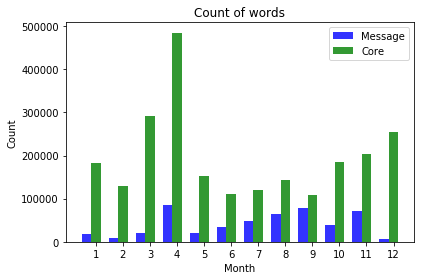

In [259]:
#not able to plot all 4 types in one single plot yet

import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 12
#count = message_count
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, message_count, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Message')

rects2 = plt.bar(index + bar_width, core_count, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Core')



plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of words')
plt.xticks(index + bar_width, range(1,13))
plt.legend()
 
plt.tight_layout()
plt.show()

In [268]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#print (__version__) 

In [269]:
import plotly.plotly as py
import plotly.graph_objs as go

random_x = month
random_y0 = message_count
random_y1 = core_count
random_y2 = process_count
random_y3 = casual_count

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'lines+markers',
    name = 'Message'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'Core'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines+markers',
    name = 'Process'
)

trace3 = go.Scatter(
    x = random_x,
    y = random_y3,
    mode = 'lines+markers',
    name = 'Casual'
)
data = [trace0, trace1, trace2, trace3]

plot(data, filename='Word count for different types')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/plotly/offline/offline.py:440: UserWarning:

Your filename `line-mode` didn't end with .html. Adding .html to the end of your file.



'file:///usr/local/share/line-mode.html'